# NASA Budget Analysis

## Introduction
The National Aeronautics and Space Administration (NASA) is celebrated for its pioneering innovations and groundbreaking achievements in space exploration and aeronautics. Over the past century, NASA has consistently received significant financial support from the U.S. government. The primary goal of this notebook is to thoroughly analyze this budget and extract valuable insights from the examination.

## Objective
This notebook analyzes NASA’s yearly budget data from 1959 to 2022.
The goal is to visualize how the funding changed over time and connect key historical events like the Moon landing, Shuttle program, and Mars missions with spikes or drops in budget.

## Dataset overview
There are 2 datasets which are used in this notebook.
1. The NASA Annual Budget dataset
 
   **Source** : [Our World In Data website](https://ourworldindata.org/grapher/nasa-annual-budget?tab=table)

   **Columns** : Entity, Code, Year, budget

   **Year Range** : 1959 --> 2022

   **NOTE** : The default currency used in this dataset is constant 2020 USD
   
2. The US Military Defense Budget Dataset
   
    **Source** : [Kaggle Dataset by **Brandon Conrady**](https://www.kaggle.com/datasets/brandonconrady/us-military-spending-by-year-1960-2020) 

    **Columns** : Year, DefenseBudget, GDP, Population
  
    **Year Range** : 1960 --> 2020
  

## Importing required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Preparation

In [3]:
main = pd.read_csv("/Users/Sakib/CODE Stuffs /Sakib's Stuffs/PYTHON/DS Roadmap /nasa-annual-budget.csv")
military = pd.read_csv("/Users/Sakib/Downloads/MilitarySpending.csv")
x = pd.merge(main,military,on="Year",how="left")

In [4]:
main

,Entity,Code,Year,Annual budget of NASA
0,United States,USA,1959,2320435000
1,United States,USA,1960,3622572000
2,United States,USA,1961,6577310000
3,United States,USA,1962,12326663000
4,United States,USA,1963,24521547000
...,...,...,...,...
59,United States,USA,2018,21598138000
60,United States,USA,2019,21937489000
61,United States,USA,2020,22629000000
62,United States,USA,2021,23271300000


In [5]:
military

,Year,DefenseBudget,GDP,Population
0,1960,47.35,543.30,180.67
1,1961,49.88,563.30,183.69
2,1962,54.65,605.10,186.54
3,1963,54.56,638.60,189.24
4,1964,53.43,685.80,191.89
...,...,...,...,...
56,2016,639.86,18745.08,322.94
57,2017,646.75,19542.98,324.99
58,2018,682.49,20611.86,326.69
59,2019,731.75,21433.22,328.24


In [6]:
x

,Entity,Code,Year,Annual budget of NASA,DefenseBudget,GDP,Population
0,United States,USA,1959,2320435000,NaN,NaN,NaN
1,United States,USA,1960,3622572000,47.35,543.30,180.67
2,United States,USA,1961,6577310000,49.88,563.30,183.69
3,United States,USA,1962,12326663000,54.65,605.10,186.54
4,United States,USA,1963,24521547000,54.56,638.60,189.24
...,...,...,...,...,...,...,...
59,United States,USA,2018,21598138000,682.49,20611.86,326.69
60,United States,USA,2019,21937489000,731.75,21433.22,328.24
61,United States,USA,2020,22629000000,778.00,20940.00,330.66
62,United States,USA,2021,23271300000,NaN,NaN,NaN


## Data Cleaning

Renaming a long column name into a short name

In [7]:
main.rename(columns={"Annual budget of NASA":"budget"},inplace=True)
main

,Entity,Code,Year,budget
0,United States,USA,1959,2320435000
1,United States,USA,1960,3622572000
2,United States,USA,1961,6577310000
3,United States,USA,1962,12326663000
4,United States,USA,1963,24521547000
...,...,...,...,...
59,United States,USA,2018,21598138000
60,United States,USA,2019,21937489000
61,United States,USA,2020,22629000000
62,United States,USA,2021,23271300000


The NASA budget dataset provided the budget in full expanded numbers. For our convenience, I have converted them into Billion figures.

In [16]:
# main["budget"] = main["budget"] / 1000000000
# x["Annual budget of NASA"] = x["Annual budget of NASA"] / 1000000000

Added another column in the NASA dataset (main) which represents rolling average budget of 5 years. It has allowed us to plot a more smoother graph later.

In [17]:
main["smooth_budget"] = main["budget"].rolling(window=5).mean()
main

,Entity,Code,Year,budget,smooth_budget
0,United States,USA,1959,2.320435,NaN
1,United States,USA,1960,3.622572,NaN
2,United States,USA,1961,6.577310,NaN
3,United States,USA,1962,12.326663,NaN
4,United States,USA,1963,24.521547,9.873705
...,...,...,...,...,...
59,United States,USA,2018,21.598138,20.517789
60,United States,USA,2019,21.937489,21.001222
61,United States,USA,2020,22.629000,21.590431
62,United States,USA,2021,23.271300,22.067971


## Exploratory Data Analysis (EDA)

### The 1st graph

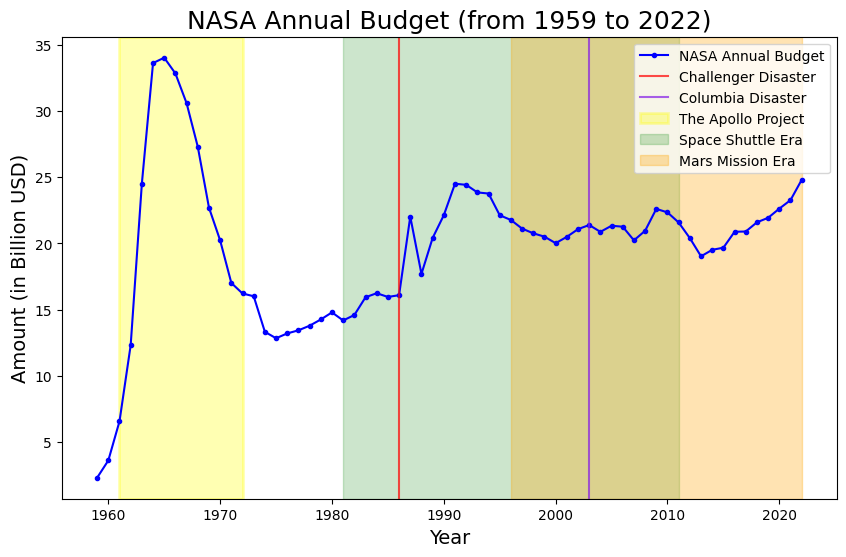

In [18]:
plt.style.use("default")
plt.figure(figsize=(10,6))
plt.plot(main["Year"],main["budget"],"b.-",label="NASA Annual Budget")

plt.axvline(1986,label="Challenger Disaster",color="Red",alpha=0.7)
plt.axvline(2003,label="Columbia Disaster",color="#841CE6",alpha=0.7)
plt.axvspan(1961,1972,label="The Apollo Project",linewidth=2,alpha=0.3,color="yellow")
plt.axvspan(1981,2011,label="Space Shuttle Era",alpha=0.2,color="green")
plt.axvspan(1996,2022,label="Mars Mission Era",color="orange",alpha=0.3)


plt.xlabel("Year",fontdict={"fontsize":14})
plt.ylabel("Amount (in Billion USD)",fontdict={"fontsize":14})
plt.title("NASA Annual Budget (from 1959 to 2022)",fontdict={"fontsize":18})
plt.legend(fontsize=10)
plt.show()

#### Observation
The plot illustrates NASA's annual budget from 1959 to 2022, measured in billions of USD. A significant peak is observed in the late 1960s, coinciding with The Apollo Project era, reaching approximately 3.5 billion USD, reflecting the intense investment in the moon landing missions. Post-1970, the budget declined sharply but stabilized around 1.5 billion USD through the 1980s and 1990s, overlapping with the Space Shuttle Era. Notable dips occur around the Challenger Disaster (1986) and Columbia Disaster (2003), indicating temporary budget impacts. From the 2000s onward, the budget shows a gradual increase, particularly during the Mars Mission Era, approaching 2.5 billion USD by 2020, suggesting a renewed focus on Mars exploration.

### The 2nd Graph

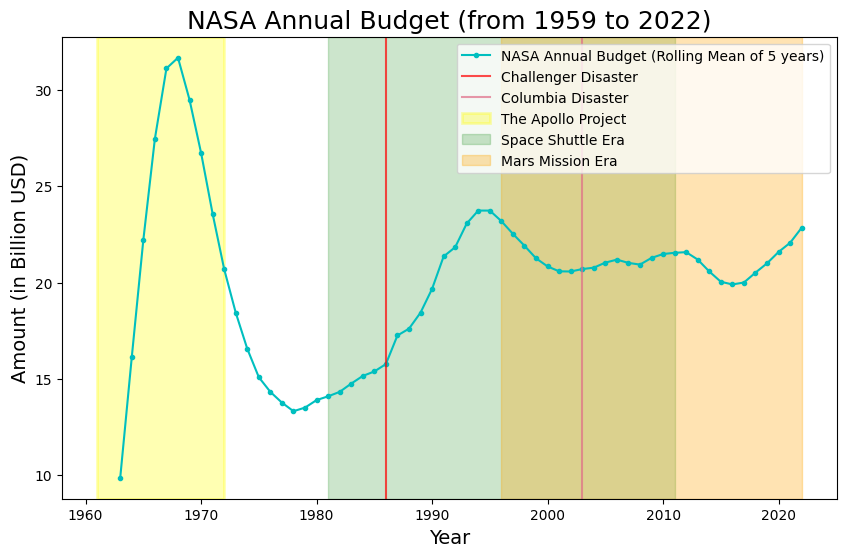

In [19]:
plt.style.use("default")
plt.figure(figsize=(10,6))
plt.plot(main["Year"],main["smooth_budget"],"c.-",label="NASA Annual Budget (Rolling Mean of 5 years)")
plt.xlabel("Year",fontdict={"fontsize":14})
plt.ylabel("Amount (in Billion USD)",fontdict={"fontsize":14})

plt.axvline(1986,label="Challenger Disaster",color="Red",alpha=0.7)
plt.axvline(2003,label="Columbia Disaster",color="#e06c87",alpha=0.7)
plt.axvspan(1961,1972,label="The Apollo Project",linewidth=2,alpha=0.3,color="yellow")
plt.axvspan(1981,2011,label="Space Shuttle Era",alpha=0.2,color="green")
plt.axvspan(1996,2022,label="Mars Mission Era",color="orange",alpha=0.3)

plt.title("NASA Annual Budget (from 1959 to 2022)",fontdict={"fontsize":18})
plt.legend(fontsize=10)
plt.show()

#### Observation
This graph is almost identical to the first one. The only difference is that we’ve used a function from the pandas library called `.rolling()`. We’ve calculated the 5-year rolling mean and plotted it here to smooth the graph and enhance its understandability. Rest of the observation remains the same as the first graph.

### The 3rd Graph

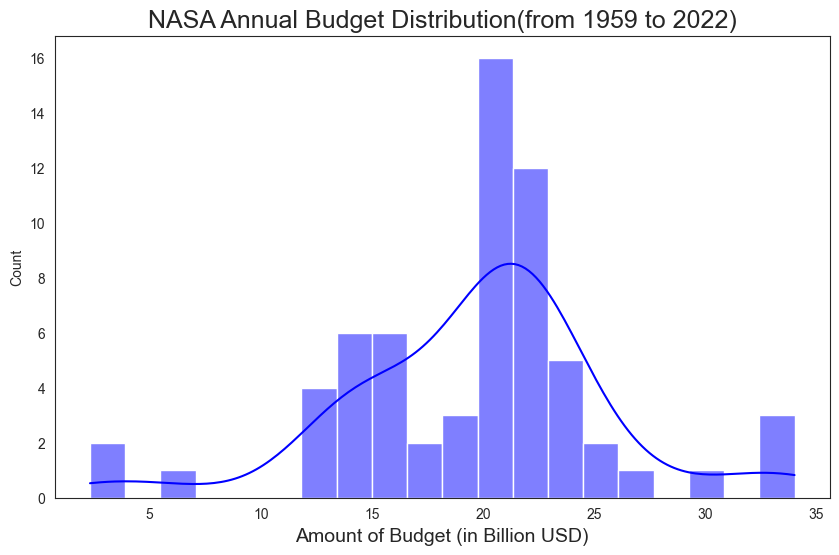

In [20]:
sns.set_style("white")
plt.figure(figsize=(10,6))
sns.histplot(main["budget"],bins=20,kde=True,color="Blue")
plt.xlabel("Amount of Budget (in Billion USD)",fontdict={"fontsize":14})
plt.title("NASA Annual Budget Distribution(from 1959 to 2022)",fontdict={"fontsize":18})
plt.show()

#### Observation
The histogram illustrates the distribution of NASA's annual budget from 1959 to 2022, measured in billions of USD with a superimposed kernel density curve. The budget distribution peaks between 1.5 and 2.5 billion USD, with the highest frequency around 2.0 billion USD, occurring 15-16 times. Budgets below 1.0 billion USD and above 3.0 billion USD are rare, each occurring 1-2 times, reflecting the exceptional nature of early years and the Apollo era. The density curve confirms a central tendency around 2.0 billion USD, with a skewed distribution toward lower values.

### The 4th Dataset

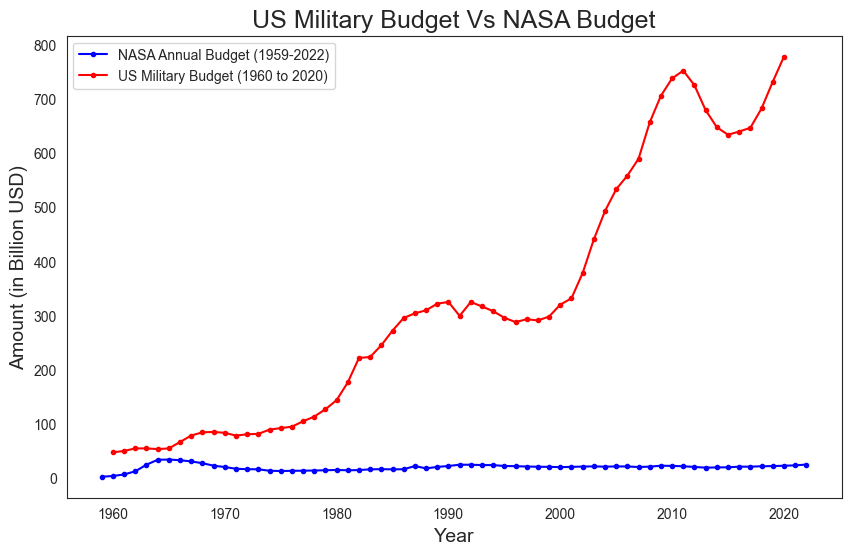

In [21]:
plt.figure(figsize=(10,6))
plt.plot(x["Year"],x["Annual budget of NASA"],"b.-",label="NASA Annual Budget (1959-2022)")
plt.plot(x["Year"],x["DefenseBudget"],"r.-",label="US Military Budget (1960 to 2020)")

plt.xlabel("Year",fontdict={"fontsize":14})
plt.ylabel("Amount (in Billion USD)",fontdict={"fontsize":14})
plt.title("US Military Budget Vs NASA Budget",fontdict={"fontsize":18})
plt.legend(fontsize=10)
plt.show()

#### Observation
The plot compares the US Military Budget (1960-2020) and NASA Annual Budget (1959-2022), both in billions of USD. The NASA budget remains relatively stable, fluctuating between 0 and 50 billion USD, with a slight peak in the late 1960s during the Apollo era, averaging around 20-30 billion USD. In contrast, the US Military Budget shows a significant increase, starting at approximately 100 billion USD in 1960, peaking above 700 billion USD by 2020, with notable rises during the 1980s and post-2000 periods. The merged datasets highlight the vast disparity, with military spending consistently dwarfing NASA’s budget over the decades.

## Conclusion

### Final Takeaways

- NASA's annual budget peaked during the Apollo era (late 1960s) at around 3.5 billion USD, showing a historical focus on moon missions, but has since stabilized and gradually increased to about 2.5 billion USD by 2020, especially during the Mars Mission Era.
  
- Budget fluctuations correlate with major events like the Challenger (1986) and Columbia (2003) disasters, indicating temporary impacts, though the overall trend remains consistent with past patterns.
- The distribution of NASA's budget over 1959-2022 centers around 2.0 billion USD, with rare instances below 1.0 billion USD or above 3.0 billion USD, reflecting a traditional range of funding levels.
- The use of smoothing (5-year rolling mean) and distribution analysis confirms a steady state for NASA funding post-Apollo, with no dramatic shifts, aligning with historical funding stability.
- Compared to the US Military Budget, NASA's allocation is negligible, with military spending rising from 100 billion USD in 1960 to over 700 billion USD by 2020, underscoring a long-standing priority on defense over space exploration.

### Thanks :)
Thank you for your time and effort in reviewing this analysis. I trust that the information and subject matter were engaging and informative. Have a pleasant day.

**Made By Sakib**